In [ ]:
# Importing Libraries
import cv2 as cv
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
# Reading Dataset
data = pd.read_csv('/content/A_Z Handwritten Data.csv')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [ ]:
# Check NULL values
print(data.isna().sum())

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64


In [ ]:
# Summarize features
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


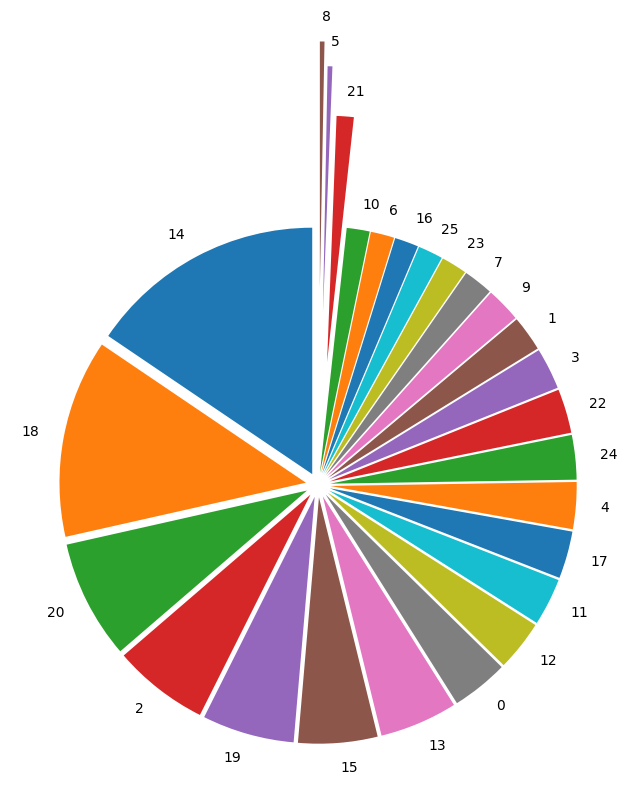

In [ ]:
# Distribution of data
x = data['0'].astype('int16').value_counts() # sort_values(axis='index')
plt.figure(figsize=[8, 8])
plt.pie(x.values, labels=x.index, startangle=90, explode=(0.05,)*23 + (0.5, 0.7, 0.8),)
plt.show()

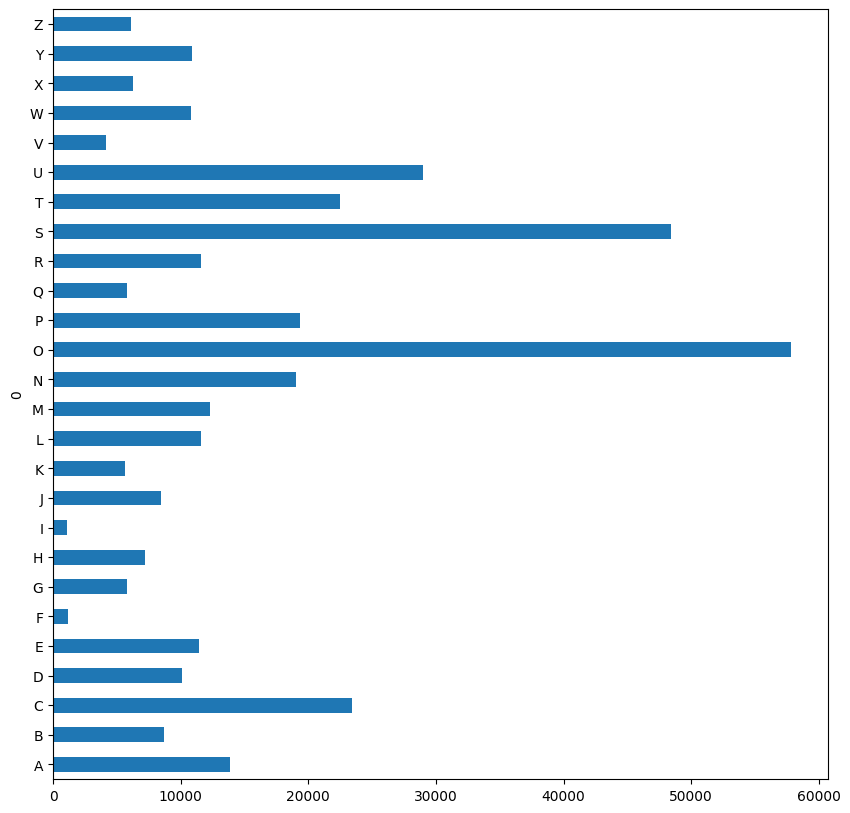

In [ ]:
# Plotting the number of alphabets in the dataset
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
dataset_alphabets = data.copy()
data['0'] = data['0'].map(alphabets_mapper)

label_size = data.groupby('0').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

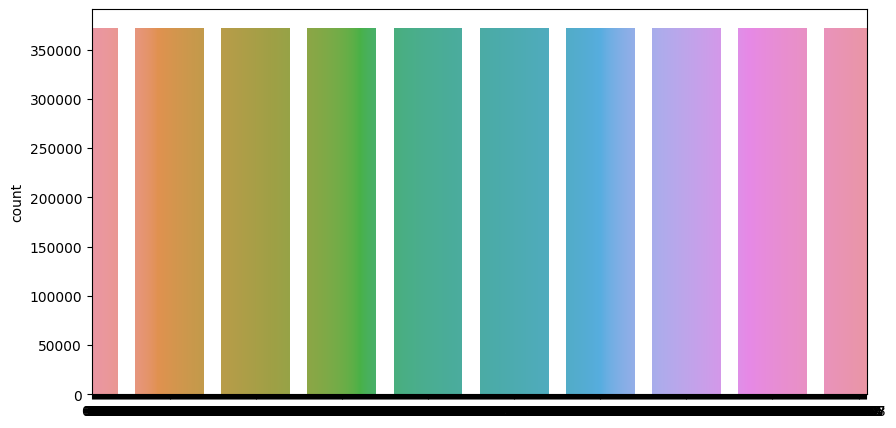

In [ ]:
# Imbalances in data
plt.figure(figsize = (10,5))
sns.countplot(data)
plt.show()

In [ ]:
# Creating Independent and dependent features
X = data.iloc[:, 1:]
y = data.iloc[:, :1]
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


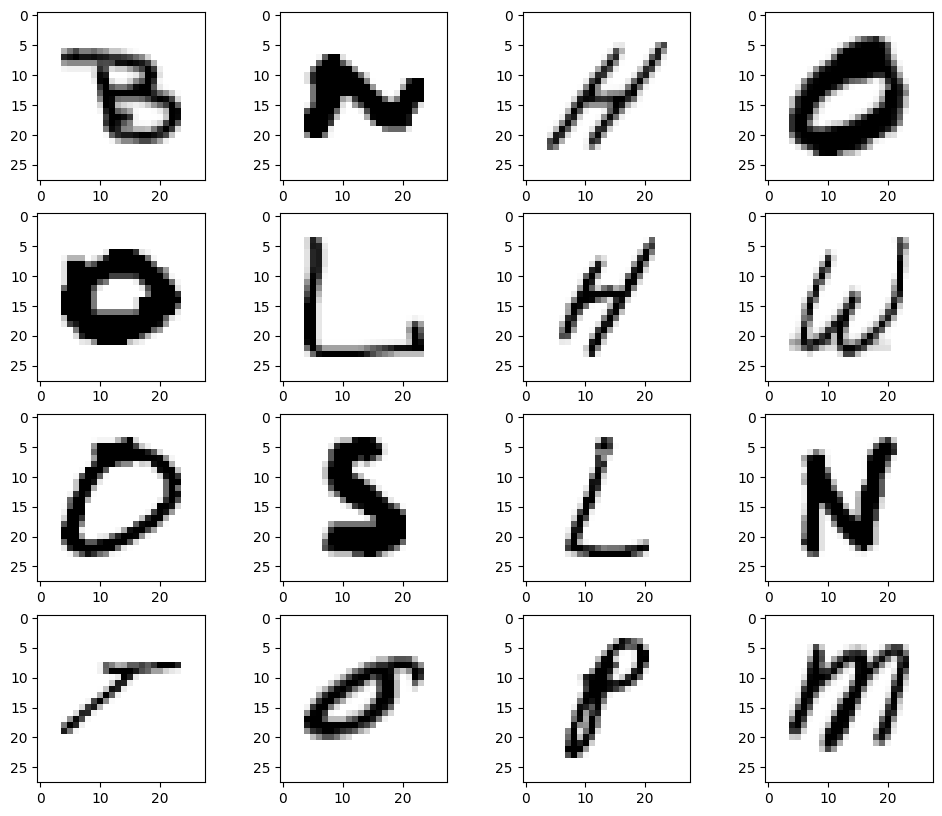

In [ ]:
# Data Images
X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

In [ ]:
#Splitting dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (297960, 784)
Test data shape:  (74490, 784)


In [ ]:
# Scaling the data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
# Build an ordinary "Deep Learning" model with CNN
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))
# Choose an optimizer and compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 348,026
Trainable params: 348,026
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train,y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
2328/2328 [==============================] - 24s 5ms/step - loss: 0.2902 - accuracy: 0.9205 - val_loss: 0.1277 - val_accuracy: 0.9660
Epoch 2/10
2328/2328 [==============================] - 11s 5ms/step - loss: 0.1088 - accuracy: 0.9701 - val_loss: 0.0931 - val_accuracy: 0.9750
Epoch 3/10
2328/2328 [==============================] - 12s 5ms/step - loss: 0.0818 - accuracy: 0.9773 - val_loss: 0.0813 - val_accuracy: 0.9778
Epoch 4/10
2328/2328 [==============================] - 13s 5ms/step - loss: 0.0666 - accuracy: 0.9815 - val_loss: 0.0701 - val_accuracy: 0.9804
Epoch 5/10
2328/2328 [==============================] - 13s 5ms/step - loss: 0.0567 - accuracy: 0.9840 - val_loss: 0.0712 - val_accuracy: 0.9805
Epoch 6/10
2328/2328 [==============================] - 13s 5ms/step - loss: 0.0480 - accuracy: 0.9862 - val_loss: 0.0640 - val_accuracy: 0.9823
Epoch 7/10
2328/2328 [==============================] - 13s 5ms/step - loss: 0.0409 - accuracy: 0.9884 - val_loss: 0.0590 - val_ac

In [ ]:
# Find accuracy, losses of Model
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9870586395263672
The training accuracy is : 0.9922741055488586
The validation loss is : 0.049440376460552216
The training loss is : 0.026073047891259193


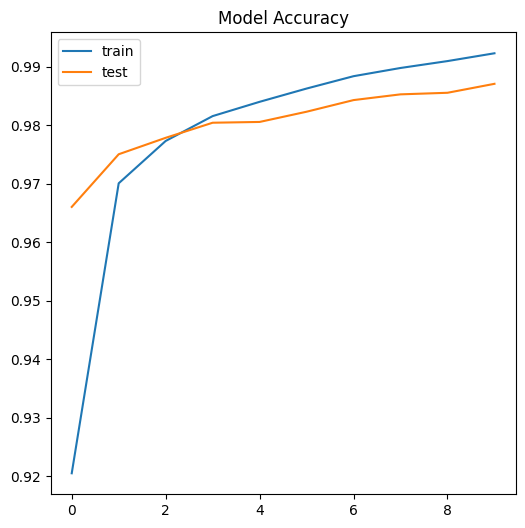

In [ ]:
# Plotting the Model Accuracy on the line graph
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [ ]:
# CNN Model Architecture with more Hyperparameters
model = Sequential()

#First Conv1D layer
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))

#Second Conv1D layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Third Conv1D layer
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))

#Dense layer 2
model.add(Dense(64,activation = 'relu'))

#Final layer of 26 nodes
model.add(Dense(26,activation = 'softmax'))

#Define the loss function to be categorical cross-entropy since it is a multi-classification problem:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# summary of the model
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
history = model.fit(X_train,y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/20
2328/2328 [==============================] - 23s 8ms/step - loss: 0.2126 - accuracy: 0.9394 - val_loss: 0.0739 - val_accuracy: 0.9798
Epoch 2/20
2328/2328 [==============================] - 17s 7ms/step - loss: 0.0704 - accuracy: 0.9804 - val_loss: 0.0517 - val_accuracy: 0.9862
Epoch 3/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0411 - val_accuracy: 0.9891
Epoch 4/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0410 - val_accuracy: 0.9890
Epoch 5/20
2328/2328 [==============================] - 15s 6ms/step - loss: 0.0356 - accuracy: 0.9899 - val_loss: 0.0360 - val_accuracy: 0.9903
Epoch 6/20
2328/2328 [==============================] - 16s 7ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0309 - val_accuracy: 0.9919
Epoch 7/20
2328/2328 [==============================] - 14s 6ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0350 - val_ac

In [ ]:
# Find accuracy, losses of Model
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9952476620674133
The training accuracy is : 0.9970096945762634
The validation loss is : 0.029642906039953232
The training loss is : 0.009477979503571987


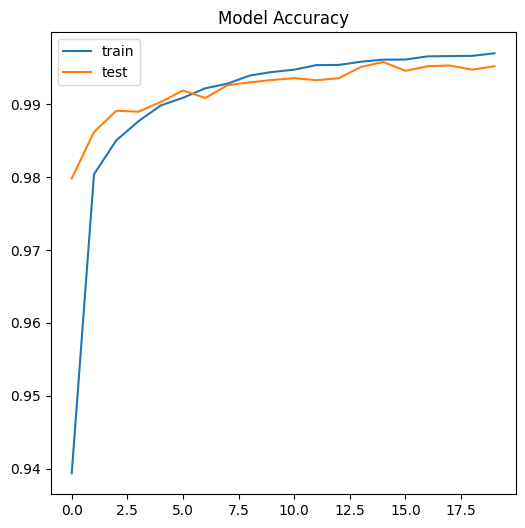

In [ ]:
# Plotting the Model Accuracy on the line graph
plt.figure(figsize = (6,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.title("Model Accuracy")
plt.show()